#### Set up notebook

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, AutoMinorLocator

from SEMITONES.enrichment_scoring import sig_interval
from SEMITONES.support_funcs import sig_dictionary
from SEMITONES.support_funcs import load_sparse_h5

In [2]:
os.chdir("../data/processed/")  # set working directory to processed data dir

### Figure 2

In [3]:
# load the RNA expression data
fname = "greenleaf_scRNA_combined_expressed_logcnorm.h5"
X_RNA = load_sparse_h5("scRNA", fname)

In [4]:
# load the gene names
fname = "greenleaf_scRNA_combined_expressed_genes.txt"
with open(fname, "r") as f:
    genes = [g.strip("\n") for g in f.readlines()]
f.close()

In [5]:
# load the enrichment scores for the data-driven selected cells
RNA_escores = pd.read_csv("greenleaf_scRNA_escores_knn_rbf_8e-1.txt",
                          sep="\t", index_col=0)

In [6]:
# load the RNA umap
UMAP_RNA = np.load("greenleaf_scRNA_combined_umap.npy")

#### Panel a

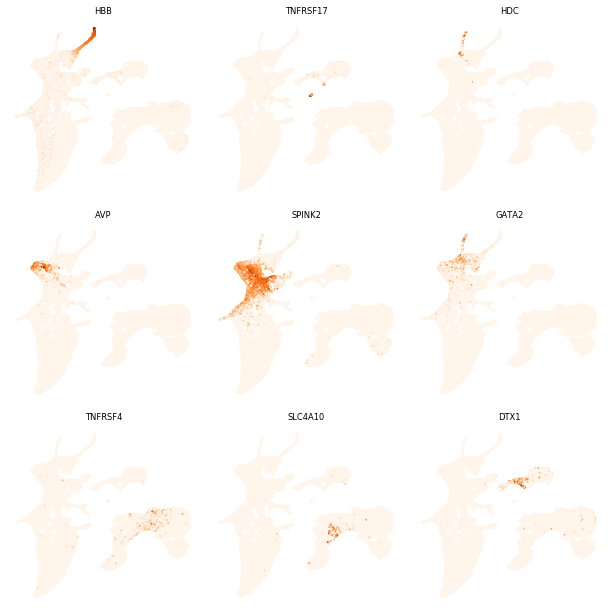

In [7]:
# plot some highly enriched markers for several cell types
selection = ["HBB", "TNFRSF17", "HDC",
             "AVP", "SPINK2", "GATA2",
             "TNFRSF4", "SLC4A10", "DTX1"]

fig, axs = plt.subplots(3, 3, dpi=75)
fig.set_figwidth(8.27)
fig.set_figheight(8.27)
for ax, gene in zip(axs.ravel(), selection):
    ax.scatter(UMAP_RNA[:, 0], UMAP_RNA[:, 1], c=X_RNA[:, genes.index(gene)].A.ravel(),
               cmap="Oranges", s=1)
    ax.set_title(gene, fontsize=8)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
plt.tight_layout()

#### Panel b

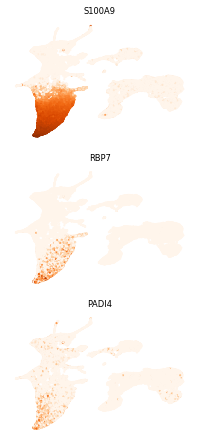

In [8]:
# plot some markers found to be highly expressed in monocytes
selection = ["S100A9", "RBP7", "PADI4"]

fig, axs = plt.subplots(3, 1, dpi=75)
fig.set_figwidth(8.27/3)
fig.set_figheight(6)
for ax, gene in zip(axs.ravel(), selection):
    ax.scatter(UMAP_RNA[:, 0], UMAP_RNA[:, 1], c=X_RNA[:, genes.index(gene)].A.ravel(),
               cmap="Oranges", s=1)
    ax.set_title(gene, fontsize=8)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
plt.tight_layout()

#### Panel c

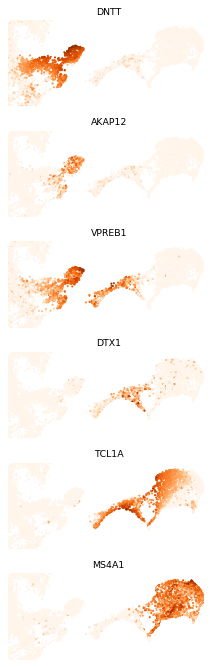

In [9]:
# plot markers of B cell development found by SEMITONES
selection = ["DNTT", "AKAP12", "VPREB1",
             "DTX1", "TCL1A", "MS4A1"]

fig, axs = plt.subplots(6, 1, dpi=75)
fig.set_figwidth(3)
fig.set_figheight(9)
for ax, gene in zip(axs.ravel(), selection):
    ax.scatter(UMAP_RNA[:, 0], UMAP_RNA[:, 1], c=X_RNA[:, genes.index(gene)].A.ravel(),
               cmap="Oranges", s=1)
    ax.set_title(gene, fontsize=9)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    ax.set_xlim(-7, 7)
    ax.set_ylim(4,10)
plt.tight_layout()

#### Panel d

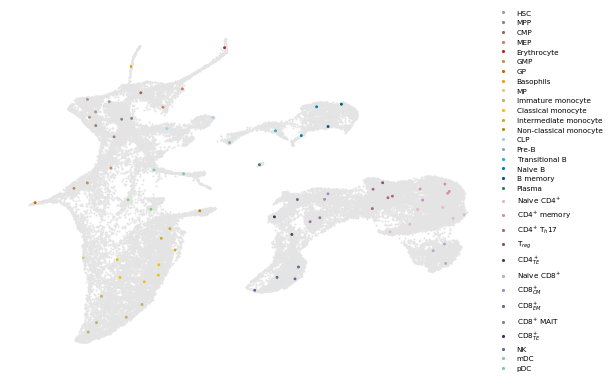

In [10]:
params = {"mathtext.default": "regular"}

# desired label order
order = ["HSC", "MPP",
         "CMP", "MEP", "ERYTHROCYTE",
         "GMP", "GP", "BASO",
         "MP", "IMMATURE MONO_CLAS", "MONO_CLAS", "MONO_INT", "MONO_NONCLAS",
         "CLP", "PRE_B", "B_TRANSITIONAL", "B_NAIVE", "B_MEMORY", "PLASMA",
         "CD4_NAIVE", "CD4_MEMORY", "CD4_TH17", "T_REG", "CD4_TERM_EFFECT",
         "CD8_NAIVE", "CD8_CENTRAL_MEMORY", "CD8_EFFECTOR_MEMORY", "CD8_MAIT",
         "CD8_TERM_EFFECT", "NK", "mDC", "pDC"]

# define real labels
labels = ["HSC", "MPP",
          "CMP", "MEP", "Erythrocyte",
          "GMP", "GP", "Basophils",
          "MP",  "Immature monocyte", "Classical monocyte", "Intermediate monocyte",
          "Non-classical monocyte",
          "CLP", "Pre-B", "Transitional B", "Naive B", "B memory", "Plasma",
          r"Naive CD4$^{+}$", r"CD4$^{+}$ memory", r"CD4$^{+}$ T$_{h}$17",
          r"T$_{reg}$", "CD4$^+_{TE}$",
          r"Naive CD8$^{+}$", r"CD8$^{+}_{CM}$",
          r"CD8$^{+}_{EM}$", r"CD8$^{+}$ MAIT", r"CD8$^{+}_{TE}$", "NK", "mDC", "pDC"]

# read in the actual annotations
DD_annots = pd.read_csv("greenleaf_scRNA_knn_rbf_8e1_annotations.csv", sep="\t")

# replace labels with given labels
DD_annots = DD_annots.replace(dict(zip(order, labels)))

# assign colours to labels for legend
order = labels
colors = list(DD_annots.COLOUR)
labels = DD_annots.ANNOT
ids = [int(i) for i in DD_annots.ID]

# make the legned and markers for the legend 
coldict = dict(zip(DD_annots.ANNOT, DD_annots.COLOUR))
legend = {k: coldict[k] for k in order}
marker = [plt.Line2D([0,0], [0,0], color=c, marker="o", ls="", markersize=2)
          for c in legend.values()]

# plot the actual figure
plt.figure(figsize=(8.27, 5.5), dpi=75)
plt.scatter(UMAP_RNA[:, 0], UMAP_RNA[:, 1], color="#e4e4e4", s=1)
plt.scatter(UMAP_RNA[DD_annots.ID, 0], UMAP_RNA[DD_annots.ID, 1],
            c=DD_annots.COLOUR.values, s=3)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_frame_on(False)

# plot the legend
leg = plt.legend(marker, legend.keys(), numpoints=1, fontsize=7, ncol=1,
                 loc="center right", bbox_to_anchor=(1.25, .5))
leg.get_frame().set_linewidth(0.0)
plt.tight_layout()

### Figure 3
Figure 2 was made in a separate notebook for interactive design. The scripts are found in S3_coenrichment_graphs_interaction_values.ipynb

#### S100A4

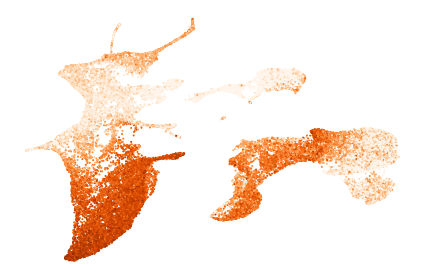

In [11]:
# plot the expression of S100A4
gene = "S100A4"

plt.scatter(UMAP_RNA[:, 0], UMAP_RNA[:, 1],
            c=X_RNA[:, genes.index(gene)].A.ravel(),
            cmap="Oranges", s=1)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_frame_on(False)
plt.tight_layout()

### Figure 4

In [12]:
# download the UMAP of 1000 most enriched and 1000 most variable genes
FS_UE1000 = np.load("greenleaf_scRNA_E1000_UMAP.npy")
FS_UD1000 = np.load("greenleaf_scRNA_D1000_UMAP.npy")
FS_UMAPs = [FS_UE1000, FS_UD1000]
GUI_annots = pd.read_csv("greenleaf_scRNA_gui_rbf_8e1_annotations.csv", sep="\t")

#### Panel a and c

In [13]:
params = {"mathtext.default": "regular"}
# the order of the labels
order = ["HSC", "MPP",
         "CMP", "MEP", "ERYTHROCYTE",
         "GMP", "GP", "BASO",
         "MP", "IMMATURE MONO_CLAS", "MONO_CLAS", "MONO_INT", "MONO_NONCLAS",
         "CLP", "PRE_B", "B_TRANSITIONAL", "B_NAIVE", "B_MEMORY", "PLASMABLAST",
         "PLASMA",
         "CD4_NAIVE", "CD4_MEMORY", "CD4_TH17", "T_REG",
         "CD8_NAIVE", "CD8_CENTRAL_MEMORY", "CD8_EFFECTOR_MEMORY", "CD8_MAIT",
         "CD8_TERM_EFFECT", "NK", "mDC", "pDC"]
# the actual labels
labels = ["HSC", "MPP",
          "CMP", "MEP", "Erythrocyte",
          "GMP", "GP", "Basophils",
          "MP",  "Immature monocyte", "Classical monocyte", "Intermediate monocyte",
          "Non-classical monocyte",
          "CLP", "Pre-B", "Transitional B", "Naive B", "B memory", "Plasmablast", "Plasma",
          r"Naive CD4$^{+}$", r"CD4$^{+}$ memory", r"CD4$^{+}$ T$_{h}$17",
          r"T$_{reg}$",
          r"Naive CD8$^{+}$", r"CD8$^{+}_{CM}$", r"CD8$^{+}_{EM}$", r"CD8$^{+}$ MAIT",
          r"CD8$^{+}_{TE}$", "NK", "mDC", "pDC"]

# the annotations of the GUI-selected cells
GUI_annots = GUI_annots.replace(dict(zip(order, labels)))
order = labels
colors = list(GUI_annots.COLOUR)
labels = GUI_annots.ANNOT
GUI_idxs = [int(i) for i in GUI_annots.ID]

# construct the legend
coldict = dict(zip(GUI_annots.ANNOT, GUI_annots.COLOUR))
legend = {k: coldict[k] for k in order}
marker = [plt.Line2D([0,0], [0,0], color=c, marker="o", ls="", markersize=2)
          for c in legend.values()]

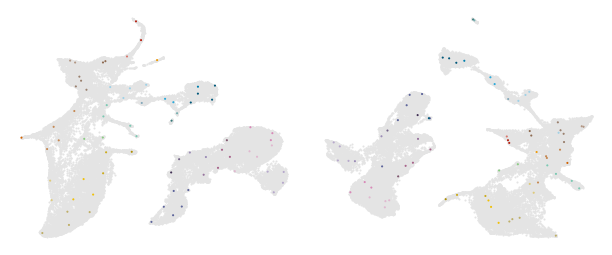

In [14]:
# plot the enrichment-based UMAP and HVG-based UMAPs
fig, axs = plt.subplots(1, 2, dpi=75)
fig.set_figwidth(8.27)
fig.set_figheight(3.5)
plt.subplots_adjust(wspace=0.1)
for UMAP, ax in zip(FS_UMAPs, axs.ravel()):
    ax.scatter(UMAP[:, 0], UMAP[:, 1], color="#e4e4e4", s=1)
    ax.scatter(UMAP[GUI_idxs, 0], UMAP[GUI_idxs, 1], c=colors, s=1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
plt.tight_layout()

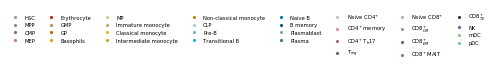

In [15]:
# plot the legend separately
plt.figure(figsize=(8.27, 1), dpi=75)
ax = plt.gca()
ax.axis(False)
leg = ax.legend(marker, legend.keys(), numpoints=1, fontsize=5, ncol=8,
                loc="lower center", markerscale=1)
leg.get_frame().set_linewidth(0.0)

#### Panel b

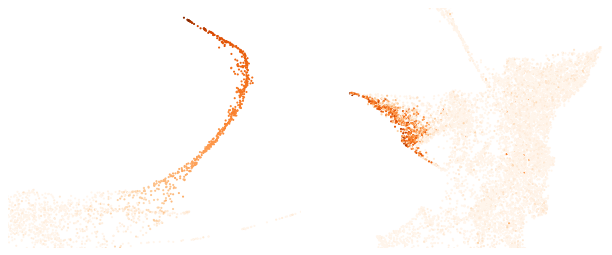

In [16]:
# HBB
fig, axs = plt.subplots(1, 2, dpi=75)
fig.set_figwidth(8.27)
fig.set_figheight(3.5)
plt.subplots_adjust(wspace=0.1)
for UMAP, ax in zip(FS_UMAPs , axs.ravel()):
    ax.scatter(UMAP[:, 0], UMAP[:, 1], c=X_RNA[:, genes.index("HBB")].data, s=1,
               cmap="Oranges")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
axs[0].set_ylim(10, 17)
axs[0].set_xlim(-5, 0)
axs[1].set_ylim(-2, 7)
axs[1].set_xlim(1, 12)
plt.tight_layout()

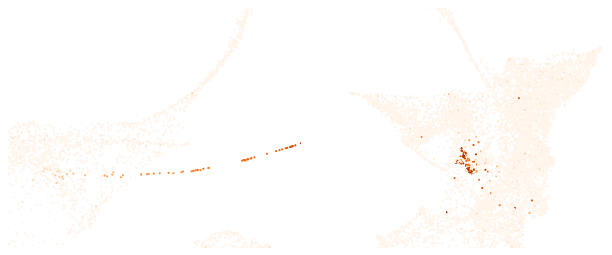

In [17]:
# CLC
fig, axs = plt.subplots(1, 2, dpi=75)
fig.set_figwidth(8.27)
fig.set_figheight(3.5)
plt.subplots_adjust(wspace=0.1)
for UMAP, ax in zip(FS_UMAPs , axs.ravel()):
    ax.scatter(UMAP[:, 0], UMAP[:, 1], c=X_RNA[:, genes.index("CLC")].data, s=1,
               cmap="Oranges")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
axs[0].set_ylim(8, 15)
axs[0].set_xlim(-5, 0)
axs[1].set_ylim(-2, 7)
axs[1].set_xlim(1, 12)
plt.tight_layout()

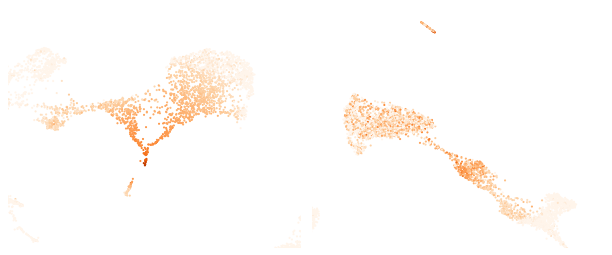

In [18]:
# IGLL5
fig, axs = plt.subplots(1, 2, dpi=75)
fig.set_figwidth(8.27)
fig.set_figheight(3.5)
plt.subplots_adjust(wspace=0.1)
for UMAP, ax in zip(FS_UMAPs , axs.ravel()):
    ax.scatter(UMAP[:, 0], UMAP[:, 1], c=X_RNA[:, genes.index("IGLL5")].data, s=1,
               cmap="Oranges")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
axs[0].set_ylim(1, 10)
axs[0].set_xlim(-2.5, 7.5)
axs[1].set_ylim(6, 19)
axs[1].set_xlim(-3, 8)
plt.tight_layout()

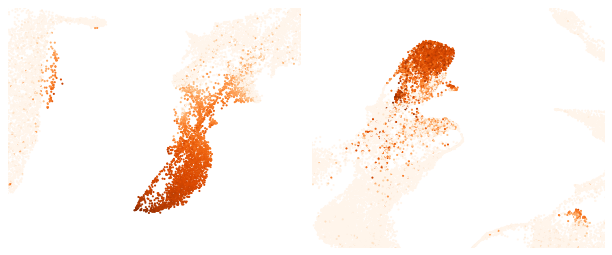

In [19]:
# GNLY
fig, axs = plt.subplots(1, 2, dpi=75)
fig.set_figwidth(8.27)
fig.set_figheight(3.5)
plt.subplots_adjust(wspace=0.1)
for UMAP, ax in zip(FS_UMAPs , axs.ravel()):
    ax.scatter(UMAP[:, 0], UMAP[:, 1], c=X_RNA[:, genes.index("GNLY")].data, s=1,
               cmap="Oranges")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
axs[0].set_ylim(-12, 0)
axs[0].set_xlim(-6, 7)
axs[1].set_ylim(-6, 11)
axs[1].set_xlim(-10, 5)
plt.tight_layout()

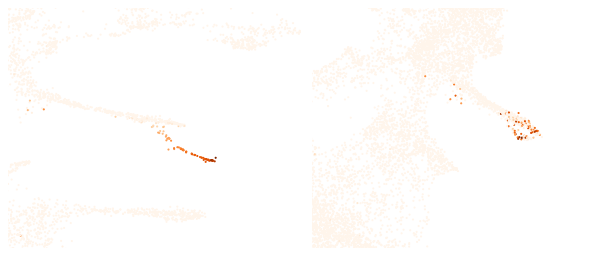

In [20]:
# PTGDS
fig, axs = plt.subplots(1, 2, dpi=75)
fig.set_figwidth(8.27)
fig.set_figheight(3.5)
plt.subplots_adjust(wspace=0.1)
for UMAP, ax in zip(FS_UMAPs , axs.ravel()):
    ax.scatter(UMAP[:, 0], UMAP[:, 1], c=X_RNA[:, genes.index("PTGDS")].data, s=1,
               cmap="Oranges")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
axs[0].set_ylim(-2, 7)
axs[0].set_xlim(-5, 0)
axs[1].set_ylim(-8, 1)
axs[1].set_xlim(4, 13)
plt.tight_layout()

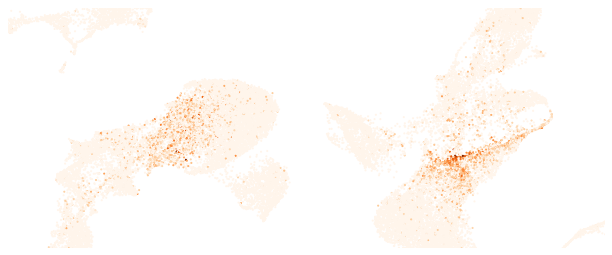

In [21]:
# TNFRSF4
fig, axs = plt.subplots(1, 2, dpi=75)
fig.set_figwidth(8.27)
fig.set_figheight(3.5)
plt.subplots_adjust(wspace=0.1)
for UMAP, ax in zip(FS_UMAPs , axs.ravel()):
    ax.scatter(UMAP[:, 0], UMAP[:, 1], c=X_RNA[:, genes.index("TNFRSF4")].data, s=1,
               cmap="Oranges")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
axs[0].set_ylim(-8, 7)
axs[0].set_xlim(-1, 13)
axs[1].set_ylim(-6, 8)
axs[1].set_xlim(-12.5, 0)
plt.tight_layout()

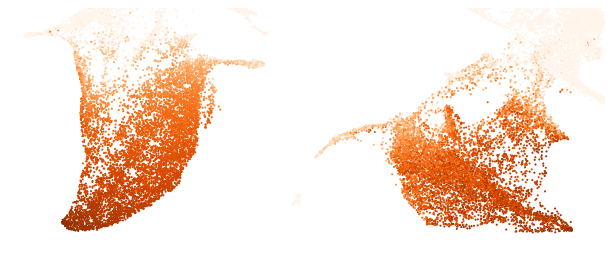

In [22]:
# S100A9
fig, axs = plt.subplots(1, 2, dpi=75)
fig.set_figwidth(8.27)
fig.set_figheight(3.5)
plt.subplots_adjust(wspace=0.1)
for UMAP, ax in zip(FS_UMAPs , axs.ravel()):
    ax.scatter(UMAP[:, 0], UMAP[:, 1], c=X_RNA[:, genes.index("S100A9")].data, s=1,
               cmap="Oranges")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
axs[0].set_ylim(-13, 3)
axs[0].set_xlim(-13, 0)
axs[1].set_ylim(-11, 2)
axs[1].set_xlim(-2, 10)
plt.tight_layout()

### Figure 5

In [23]:
# write a binarization function
def binarize(X, t):
    X = X.copy()
    condition = X.data >= t
    X.data[condition] = 1
    X.data[np.logical_not(condition)] = 0
    return X

In [24]:
# download the ATAC-seq data
fname = "../interim/greenleaf_scATAC_peaks_filtered.h5"
X_ATAC = load_sparse_h5("scATAC", fname)

In [25]:
# download the peak names
with open("../interim/greenleaf_scATAC_peaks_filtered.txt", "r") as f:
    peaks = [g.strip("\n") for g in f.readlines()]
f.close()

In [26]:
# binarize the ATAC-seq data
X_ATAC = binarize(X_ATAC, 1)

In [27]:
# download the ATAC-seq UMAP
UMAP_ATAC = np.load("../interim/greenleaf_scATAC_filtered_umap.npy")

#### Panel a

In [28]:
# load the peak enrichment scores
peakscores = pd.read_csv("greenleaf_scATAC_escores_knn_rbf_8e-1.txt",
                         sep="\t", index_col=0)

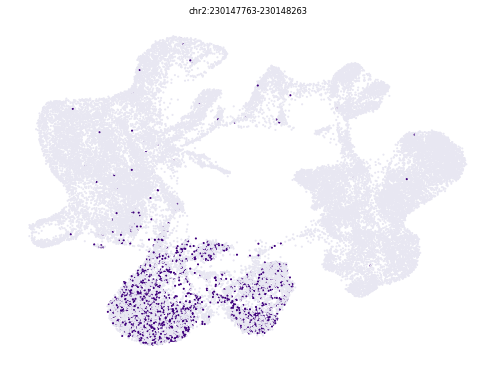

In [29]:
# plot the 54th most enriched peak in cell 4896 because it is a known enhancer
n1 = "chr2_230147763_230148263"
plt.figure(figsize=(8.27, 6), dpi=75)
plt.scatter(UMAP_ATAC[:, 0], UMAP_ATAC[:, 1],
            c=X_ATAC[:, peaks.index(n1)].A.ravel(),
            cmap="Purples", vmin=-.2, vmax=1, s=1)
plt.title("chr2:230147763-230148263", fontsize=8)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_frame_on(False)

In [30]:
n1

'chr2_230147763_230148263'

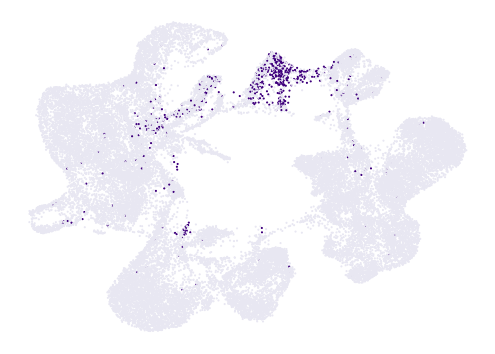

In [31]:
# plot the second most enriched gene in the transitional B cell
n2 = peakscores.sort_values(by="408", ascending=False).index[1]
plt.figure(figsize=(8.27, 6), dpi=75)
plt.scatter(UMAP_ATAC[:, 0], UMAP_ATAC[:, 1],
            c=X_ATAC[:, peaks.index(n2)].A.ravel(),
            cmap="Purples", vmin=-.2, vmax=1, s=1)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_frame_on(False)

In [32]:
n2

'chr15_66446188_66446688'

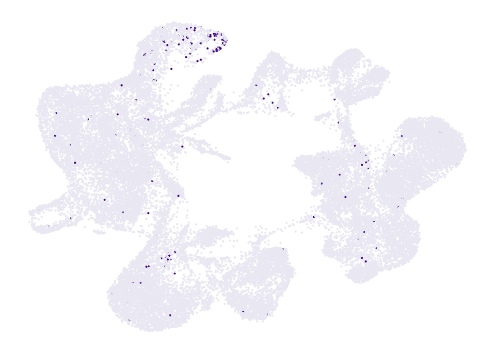

In [33]:
# plot the third most enriched gene in an erythrocyte
n3 = peakscores.sort_values(by=peakscores.columns[0], ascending=False).index[0]
plt.figure(figsize=(8.27, 6), dpi=75)
plt.scatter(UMAP_ATAC[:, 0], UMAP_ATAC[:, 1],
            c=X_ATAC[:, peaks.index(n3)].A.ravel(),
            cmap="Purples", vmin=-.2, vmax=1, s=1)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_frame_on(False)

In [34]:
n3

'chr12_51295387_51295887'

#### Panel b

In [35]:
# load the peak annotations
peak_annots = pd.read_csv("greenleaf_scATAC_knn_rbf_8e1_annotations.csv",
                          sep="\t")

In [36]:
params = {"mathtext.default": "regular"}

# order for legend
order = ["HSC", "MPP", "CMP",
         "MEP", "ERYTHROCYTE",
         "GMP", "GP", "BASO",
         "MP", "MONO", "MONO_CLAS", "MONO_INT", "MoDC",
         "CLP", "PRE_B", "B_TRANSITIONAL", "B_NAIVE", "B_MEMORY", "PLASMA",
         "CD4_NAIVE", "CD4_MEMORY", "CD8_MAIT",
         "CD8_EFFECTOR_MEMORY", "CD8_TERM_EFFECT",
         "NK", "preDC", "pDC", "UNK"]

# corresponding labels
labels = ["HSC", "MPP",
          "CMP", "MEP", "Erythrocytes",
          "GMP", "GP", "Basophils",
          "MP", "Monocyte", "Classical monocyte", "Intermediate monocyte",
          "MoDC",
          "CLP", "Pre-B", "Transitional B", "Naive B", "B memory", "Plasma",
          r"Naive CD4$^{+}$", r"CD4$^{+}$ memory",
          r"CD8$^{+}$ MAIT", r"CD8$^{+}_{EM}$",
          r"CD8$^{+}_{TE}$", "NK", "preDC", "pDC", "Unknown"]

peak_annots = peak_annots.replace(dict(zip(order, labels)))
order = labels
colors = list(peak_annots.COLOUR)
labels = peak_annots.ANNOT
idxs = [int(i) for i in peak_annots.ID]

coldict = dict(zip(peak_annots.ANNOT, peak_annots.COLOUR))
legend = {k: coldict[k] for k in order}
marker = [plt.Line2D([0,0], [0,0], color=c, marker="o", ls="", markersize=2)
          for c in legend.values()]

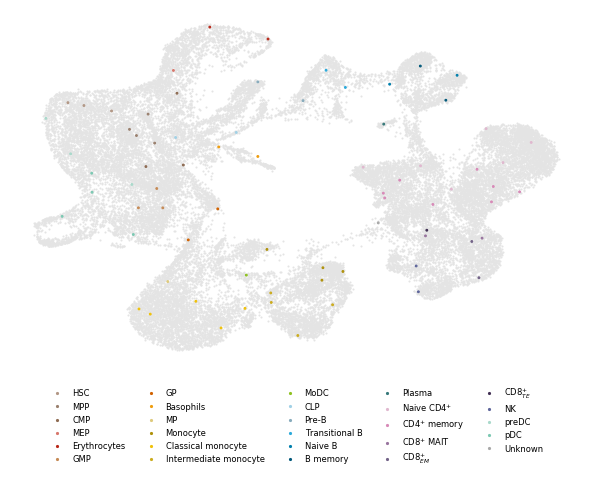

In [37]:
plt.figure(figsize=(8.27, 6.5), dpi=75)
plt.scatter(UMAP_ATAC[:, 0], UMAP_ATAC[:, 1], color="#e4e4e4", s=1)
plt.scatter(UMAP_ATAC[peak_annots.ID, 0], UMAP_ATAC[peak_annots.ID, 1],
            c=peak_annots.COLOUR.values, s=3)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_frame_on(False)

leg = plt.legend(marker, legend.keys(), numpoints=1, fontsize=8, ncol=5,
                 loc="lower center", bbox_to_anchor=(0.5, -0.3))
leg.get_frame().set_linewidth(0.0)
plt.tight_layout()

#### Panel d

In [38]:
# load the null-distribution of the peak scores
peaknull = pd.read_csv("../interim/greenleaf_scATAC_pscores_knn_rbf_8e-1.txt",
                       sep="\t", index_col=0)

In [39]:
# get the significant peaks, positive significant peaks, and negative significant peaks
cutoffs = sig_interval(peaknull, n_sds=20)
sigdict = sig_dictionary(peakscores, cutoffs)
positives = sig_dictionary(peakscores, cutoffs, sign="positive")
negatives = sig_dictionary(peakscores, cutoffs, sign="negative")

In [40]:
# read the HOMER peak annotations
HOMER = pd.read_csv("greenleaf_scATAC_peak_annotations_HOMER.txt", sep="\t")
# correct start index
HOMER.Start = HOMER.Start - 1
# rename index
HOMER.index = HOMER["Chr"] + "_" + HOMER["Start"].astype(str) + "_" + HOMER["End"].astype(str)
# subset column names and rename columns
columns = ["Annotation", "Detailed Annotation", "Distance to TSS",
           "Nearest PromoterID", "Gene Name"]
HOMER = HOMER[columns]
newcols = ["annotation", "detailed", "TSS_dist", "promoter", "gene"]
HOMER = HOMER.rename(columns=dict(zip(columns, newcols)))
# change annotation names
annotations = HOMER.annotation
annotations = ["intron" if "intron" in r else r for r in annotations]
annotations = ["promoter" if "promoter-TSS" in r else r for r in annotations]
annotations = ["non_coding" if "non-coding" in r else r for r in annotations]
annotations = ["3'UTR" if "3' UTR" in r else r for r in annotations]
annotations = ["5'UTR" if "5' UTR" in r else r for r in annotations]
annotations = ["intergenic" if "Intergenic" in r else r for r in annotations]
annotations = ["TTS" if "TTS" in r else r for r in annotations]
annotations = ["exon" if "exon" in r else r for r in annotations]
HOMER.annotation = annotations

In [41]:
# get enhancer annotations
FANTOM5 = pd.read_csv("greenleaf_scATAC_FANTOM5_enhancer_peaks.txt", sep="\t",
                      header=None)
FANTOM5 = FANTOM5[0] + "_" + FANTOM5[1].astype(str) + "_" + FANTOM5[2].astype(str)
# only call something an enhancer if a region is not a promoter
enhancers = np.where(np.isin(list(HOMER.index), list(FANTOM5)))[0]
enhancers = [x for x in enhancers if not HOMER.annotation[x] == "promoter"]
HOMER.iloc[enhancers, 0] = "enhancer"

In [42]:
# explore total proportions within signficant regions
n_sig = {}
for i in np.unique(HOMER.annotation):
    n_sig[i] = []
    for c, v in sigdict.items():
        if not len(v) == 0:
            n = len(HOMER.loc[v, :][HOMER.loc[v, :].annotation == i])
            p = n / len(HOMER.loc[v, :]) * 100
            n_sig[i].append(p)
        else:
            continue
n_sig = pd.DataFrame(n_sig).T
n_sig = n_sig.reindex(["promoter", "enhancer", "intergenic", "intron",
                       "exon", "3'UTR", "5'UTR", "TTS", "non_coding"])

In [43]:
# explore total proportions within signficant regions
n_pos = {}
for i in np.unique(HOMER.annotation):
    n_pos[i] = []
    for c, v in positives.items():
        if not len(v) == 0:
            n = len(HOMER.loc[v, :][HOMER.loc[v, :].annotation == i])
            p = n / len(HOMER.loc[v, :]) * 100
            n_pos[i].append(p)
        else:
            continue
n_pos = pd.DataFrame(n_pos).T
n_pos = n_pos.reindex(["promoter", "enhancer", "intergenic", "intron",
                       "exon", "3'UTR", "5'UTR", "TTS", "non_coding"])

In [44]:
# explore total proportions within signficant regions
n_neg = {}
for i in np.unique(HOMER.annotation):
    n_neg[i] = []
    for c, v in negatives.items():
        if not len(v) == 0:
            n = len(HOMER.loc[v, :][HOMER.loc[v, :].annotation == i])
            p = n / len(HOMER.loc[v, :]) * 100
            n_neg[i].append(p)
        else:
            continue
n_neg = pd.DataFrame(n_neg).T
n_neg = n_neg.reindex(["promoter", "enhancer", "intergenic", "intron",
                       "exon", "3'UTR", "5'UTR", "TTS", "non_coding"])

In [45]:
# get total number for each annotations
ns = {}
for i in np.unique(HOMER.annotation):
    n = len(HOMER[HOMER.annotation == i])
    ns[i] = n
    print(f"{n} {i} annotations")
ns = pd.DataFrame(ns, index=["n"])
ns = ns[["promoter", "enhancer", "intergenic", "intron", "exon",
         "3'UTR", "5'UTR", "TTS", "non_coding"]]

7052 3'UTR annotations
1676 5'UTR annotations
8945 TTS annotations
35827 enhancer annotations
11372 exon annotations
142404 intergenic annotations
208256 intron annotations
4220 non_coding annotations
31728 promoter annotations


In [46]:
# get percentages of total annotations that are a certain annotation
ns = ns / np.sum(ns.values) * 100

In [47]:
# function to change boxplot colours
def set_box_color(bp, color):
    plt.setp(bp["medians"], color=color)
    plt.setp(bp["boxes"], color="grey")
    plt.setp(bp["whiskers"], color="grey")
    plt.setp(bp["caps"], color="grey")
    plt.setp(bp["fliers"], color=color)

In [48]:
# define colours
c1 = "#6458ad"
c2 = "#7fad7b"
c3 = "#eca639"

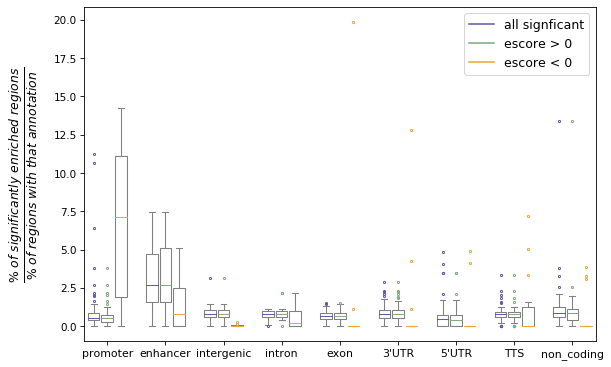

In [49]:
plt.figure(figsize=(8.27, 5), dpi=75)

# plot boxplot
obp = plt.boxplot(n_sig / ns.T.values, positions=np.array(range(len(n_pos))) * 3.0 - 0.7,
                  widths=0.6, flierprops={"markeredgecolor": c1,
                                          "markersize": 2})
pbp = plt.boxplot(n_pos / ns.T.values, positions=np.array(range(len(n_pos))) * 3.0,
                  widths=0.6, flierprops={"markeredgecolor": c2,
                                          "markersize": 2})
nbp = plt.boxplot(n_neg / ns.T.values, positions=np.array(range(len(n_neg))) * 3.0 + 0.7,
                  widths=0.6, flierprops={"markeredgecolor": c3,
                                          "markersize": 2})

# change colours
set_box_color(obp, c1)
set_box_color(pbp, c2)
set_box_color(nbp, c3)

# legend
plt.plot([], c=c1, label="all signficant")
plt.plot([], c=c2, label="escore > 0")
plt.plot([], c=c3, label="escore < 0")
plt.legend(fontsize=12)

plt.ylabel(r"$\frac{\%\ of\ significantly\ enriched\ regions}{\%\ of\ regions\ with\ that\ annotation}$",
           fontsize=17, labelpad=10)
plt.xticks(np.array(range(len(n_pos))) * 3.0, labels=n_sig.index, fontsize=10.5)
plt.tight_layout()

### Figure 6

Text(1.1, 1.1, 'd')

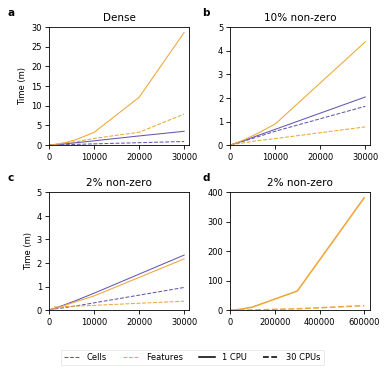

In [50]:
c1 = "#6458ad"
c2 = "#eca639"

fig, axs = plt.subplots(2, 2, dpi=75)
fig.set_figwidth(8.27/3*2)
fig.set_figheight(5)
plt.subplots_adjust(hspace=0.4, wspace=0.3)

densities = ["dense", "10psparse", "2psparse"]
for d, ax in zip(densities, axs.ravel()[0:3]):  # loop over the different density plots
    # load runtimes for 30 CPUs
    ctimes30 = pd.read_csv(f"20200515_timeit_{d}_ncells.txt", sep="\t", index_col=0)
    ncells30 = [int(n.split("_")[0]) for n in ctimes30.columns]
    ftimes30 = pd.read_csv(f"20200515_timeit_{d}_nfeats.txt", sep="\t", index_col=0)
    nfeats30 = [int(n.split("_")[1]) for n in ftimes30.columns]
    # load runtimes for 1 CPU
    ctimes1 = pd.read_csv(f"20200515_timeit_{d}_ncells_1cpu.txt", sep="\t", index_col=0)
    ncells1 = [int(n.split("_")[0]) for n in ctimes1.columns]
    ftimes1 = pd.read_csv(f"20200515_timeit_{d}_nfeats_1cpu.txt", sep="\t", index_col=0)
    nfeats1 = [int(n.split("_")[1]) for n in ftimes1.columns]

    if d == "2psparse":  # only use the first 6 times
        ctimes30 = ctimes30.iloc[:, 0:6]
        ncells30 = [int(n.split("_")[0]) for n in ctimes30.columns]
        ftimes30 = ftimes30.iloc[:, 0:6]
        nfeats30 = [int(n.split("_")[1]) for n in ftimes30.columns]
        ctimes1 = ctimes1.iloc[:, 0:6]
        ncells1 = [int(n.split("_")[0]) for n in ctimes1.columns]
        ftimes1 = ftimes1.iloc[:, 0:6]
        nfeats1 = [int(n.split("_")[1]) for n in ftimes1.columns]

    ax.plot(ncells30, ctimes30.mean() / 60, label="Cells", ls="--",
            color=c1, linewidth=1)
    ax.plot(nfeats30, ftimes30.mean() / 60, label="Features", ls="--",
            color=c2, linewidth=1)
    ax.plot(ncells1, ctimes1.mean() / 60, label="Cells",
            color=c1, linewidth=1)
    ax.plot(nfeats1, ftimes1.mean() / 60, label="Features",
            color=c2, linewidth=1)
    ax.set_xlim(0, 31000)
    ax.set_xticks(ticks=[0, 10000, 20000, 30000])
    #ax.set_ylabel("Time (m)", fontsize=8)
    ax.tick_params(axis="both", labelsize=8)
# process larger numbers of features for 2psparse
ftimes30 = pd.read_csv("20200515_timeit_2psparse_nfeats.txt", sep="\t", index_col=0)
nfeats30 = [int(n.split("_")[1]) for n in ftimes30.columns]
ftimes1 = pd.read_csv("20200515_timeit_2psparse_nfeats_1cpu.txt", sep="\t", index_col=0)
nfeats1 = [int(n.split("_")[1]) for n in ftimes1.columns]
axs[1][1].plot(nfeats30, ftimes30.mean() / 60, label="Features", color=c2, ls="--")
axs[1][1].plot(nfeats1, ftimes1.mean() / 60, label="Features", color=c2)
axs[1][1].set_xlim(0, 625000)

# plot labels
axs[1][1].tick_params(axis="both", labelsize=8)
axs[0][0].set_ylabel("Time (m)", fontsize=8)
axs[1][0].set_ylabel("Time (m)", fontsize=8)

# plot titles
axs[0][0].set_title("Dense", fontsize=10)
axs[0][1].set_title("10% non-zero", fontsize=10)
axs[1][0].set_title("2% non-zero", fontsize=10)
axs[1][1].set_title("2% non-zero", fontsize=10)

# construct legend
handles, labels = axs[0][1].get_legend_handles_labels()
display = (0, 1)
cpu1 = plt.Line2D((0,1),(0,0), color="black", linestyle="-")
cpu30 = plt.Line2D((0,1),(0,0), color="black", linestyle="--")
leg2 = axs[0][1].legend([handle for i, handle in enumerate(handles)
           if i in display] + [cpu1, cpu30],
          [label for i, label in enumerate(labels)
           if i in display] + ["1 CPU", "30 CPUs"], ncol=4,
         bbox_to_anchor=(0.7, -1.7), fontsize=8, handlelength=1.9)
leg2.get_frame().set_linewidth(0.5)

# set limits
axs[0][0].set_ylim(0, 30)
axs[0][1].set_ylim(0, 5)
axs[1][0].set_ylim(0, 5)
axs[1][1].set_ylim(0, 400)

# include abcd boxes
axs[0][0].text(-.3, 2.5, "a", transform=ax.transAxes, 
               size=10, weight='bold')
axs[0][1].text(1.1, 2.5, "b", transform=ax.transAxes, 
               size=10, weight='bold')
axs[0][0].text(-.3, 1.1, "c", transform=ax.transAxes, 
               size=10, weight='bold')
axs[0][1].text(1.1, 1.1, "d", transform=ax.transAxes, 
               size=10, weight='bold')

### Figure S2

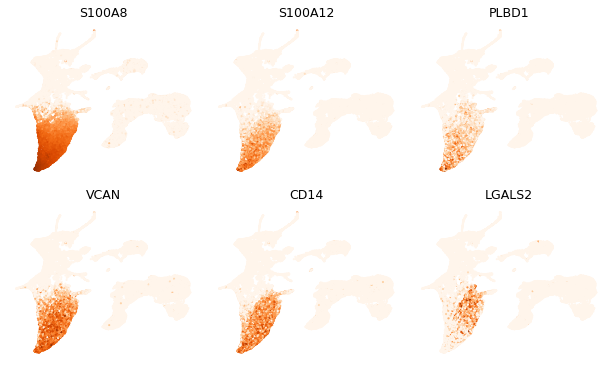

In [51]:
# plot some more marker genes for monocytes
selection = ["S100A8", "S100A12", "PLBD1",
             "VCAN", "CD14", "LGALS2"]

fig, axs = plt.subplots(2, 3, dpi=75)
fig.set_figwidth(8.27)
fig.set_figheight(5)
for ax, gene in zip(axs.ravel(), selection):
    ax.scatter(UMAP_RNA[:, 0], UMAP_RNA[:, 1],
               c=X_RNA[:, genes.index(gene)].A.ravel(),
               cmap="Oranges", s=1)
    ax.set_title(gene)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
plt.tight_layout()

### Figure S3

In [52]:
os.getcwd()

'/fast/AG_Ohler/anna/hcv1/data/processed'

In [53]:
# download the metadata from Granja et al. 2019
metadata = pd.read_csv("../external/greenleaf_scRNA_cell_metadata.txt",
                       sep="\t")
metadata["group_barcode"] = metadata.Group + ":" + metadata.Barcode

In [54]:
# load the barcodes in our filetered cells
with open("greenleaf_scRNA_combined_filtered_barcodes.txt", "r") as f:
    barcodes = [b.strip("\n") for b in f.readlines()]
f.close()

In [55]:
# define colour maps
persianorange =  "#d99058"
cplblue2 =       "#374350"
chesnut =        "#cd5c5c"
rosequartz =     "#aa98a9"
oldmauve =       "#673147"
oldrose =        "#c08081"
antiquefuchsia = "#915c83"
oldlavender =    "#796878"
pastelblue =     "#aec6cf"
babyblue =       "#a1caf1"
glaucous =       "#6082b6"
cambridge =      "#a3c1ad"
asparagus =      "#87a96b"
greyasparagus =  "#465945"
arylide =        "#e9dc9f"
oldgold =        "#d6bf4c"
orangeyellow =   "#e5a327"
brass =          "#b5a642"
olive =          "#808000"
clpblue =        "#3e4b59"
lavender =       "#e6e6fa"
teal =           "#469990"
pink =           "#fabebe"
brown =          "#a52a2a"
khaki =          "#c3b091"
orange =         "#e59400"

colors = [khaki,
          chesnut, brown,
          orange, arylide, clpblue,
          persianorange, orangeyellow,
          asparagus, teal,
          olive, brass, oldgold,
          greyasparagus,
          cplblue2,
          glaucous, babyblue, pastelblue,
          oldmauve, oldlavender, antiquefuchsia, rosequartz, oldrose, pink,
          lavender, greyasparagus]

/home/hvlot/miniconda3/envs/hcv1/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


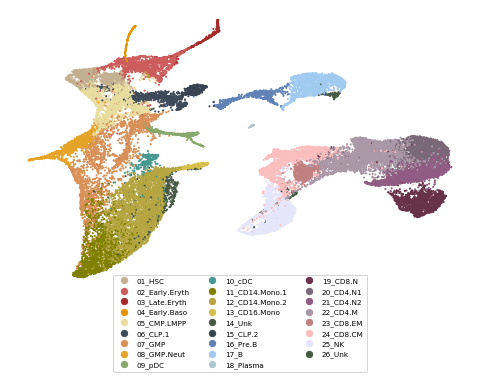

In [56]:
# create a colour dictionary and legend
labels = metadata.set_index("group_barcode", drop=False
                           ).loc[barcodes].BioClassification.values
coldict = dict(zip(np.unique(labels), colors))
color = labels
for l, c in coldict.items():
    color = [c if i == l else i for i in color]
legend = {k: coldict[k] for k in np.unique(labels)}
marker = [plt.Line2D([0,0], [0,0], color=c, marker="o", ls="")
          for c in legend.values()]

plt.figure(figsize=(8, 5), dpi=75)
plt.scatter(UMAP_RNA[:, 0], UMAP_RNA[:, 1],
            s=1, c=color)
plt.legend(marker, legend.keys(), numpoints=0.2, fontsize=7, ncol=3,
           loc="lower center", bbox_to_anchor=(0.5, -0.3))

ax = plt.axes()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_frame_on(False)

plt.show()

### Figure S4

In [57]:
# download cells selected by hand
with open("greenleaf_scRNA_cells_selected_from_gui.txt", "r") as f:
    gui_cells = [int(c.strip("\n")) for c in f.readlines()]
f.close()

In [58]:
# define the legend order
order = ["HSC", "MPP",
         "CMP", "MEP", "ERYTHROCYTE",
         "GMP", "GP", "BASO",
         "MP", "IMMATURE MONO_CLAS", "MONO_CLAS", "MONO_INT", "MONO_NONCLAS",
         "CLP", "PRE_B", "B_TRANSITIONAL", "B_NAIVE", "B_MEMORY",
         "PLASMABLAST", "PLASMA",
         "CD4_NAIVE", "CD4_MEMORY", "CD4_TH17", "T_REG",
         "CD8_NAIVE", "CD8_MAIT", "CD8_CENTRAL_MEMORY", "CD8_EFFECTOR_MEMORY",
         "CD8_TERM_EFFECT", "NK", "mDC", "pDC"]

In [59]:
# load the current annnotation
GUI_annots = pd.read_csv("greenleaf_scRNA_gui_rbf_8e1_annotations.csv", sep="\t")

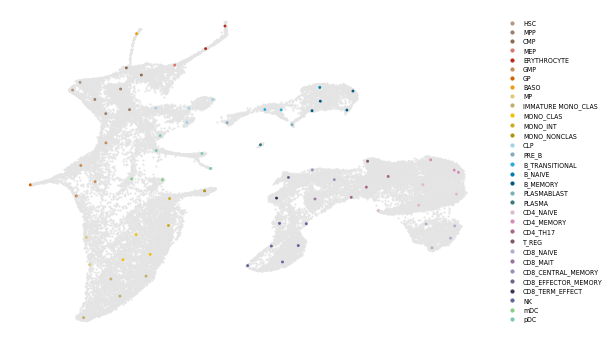

In [60]:
# create a colour dict and legend
coldict = dict(zip(GUI_annots.ANNOT, GUI_annots.COLOUR))
legend = {k: coldict[k] for k in order}
marker = [plt.Line2D([0,0], [0,0], color=c, marker="o", ls="")
          for c in legend.values()]

plt.figure(figsize=(8.27, 5), dpi=75)
plt.scatter(UMAP_RNA[:, 0], UMAP_RNA[:, 1], color="#e4e4e4", s=1)
plt.scatter(UMAP_RNA[GUI_annots.ID, 0], UMAP_RNA[GUI_annots.ID, 1],
            c=GUI_annots.COLOUR.values, s=3)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_frame_on(False)

leg = plt.legend(marker, legend.keys(), numpoints=1, fontsize=6, ncol=1,
                 markerscale=0.5, loc="center right",
                 bbox_to_anchor=(1.25, 0.5))
leg.get_frame().set_linewidth(0.0)
plt.tight_layout()

### Figure S5

In [61]:
# load the cells selected using data-driven selection with different
# embeddings and metrics
cells = pd.read_csv("20200608_hcv_cell_selections_for_figure.txt", sep="\t",
                    index_col=0)

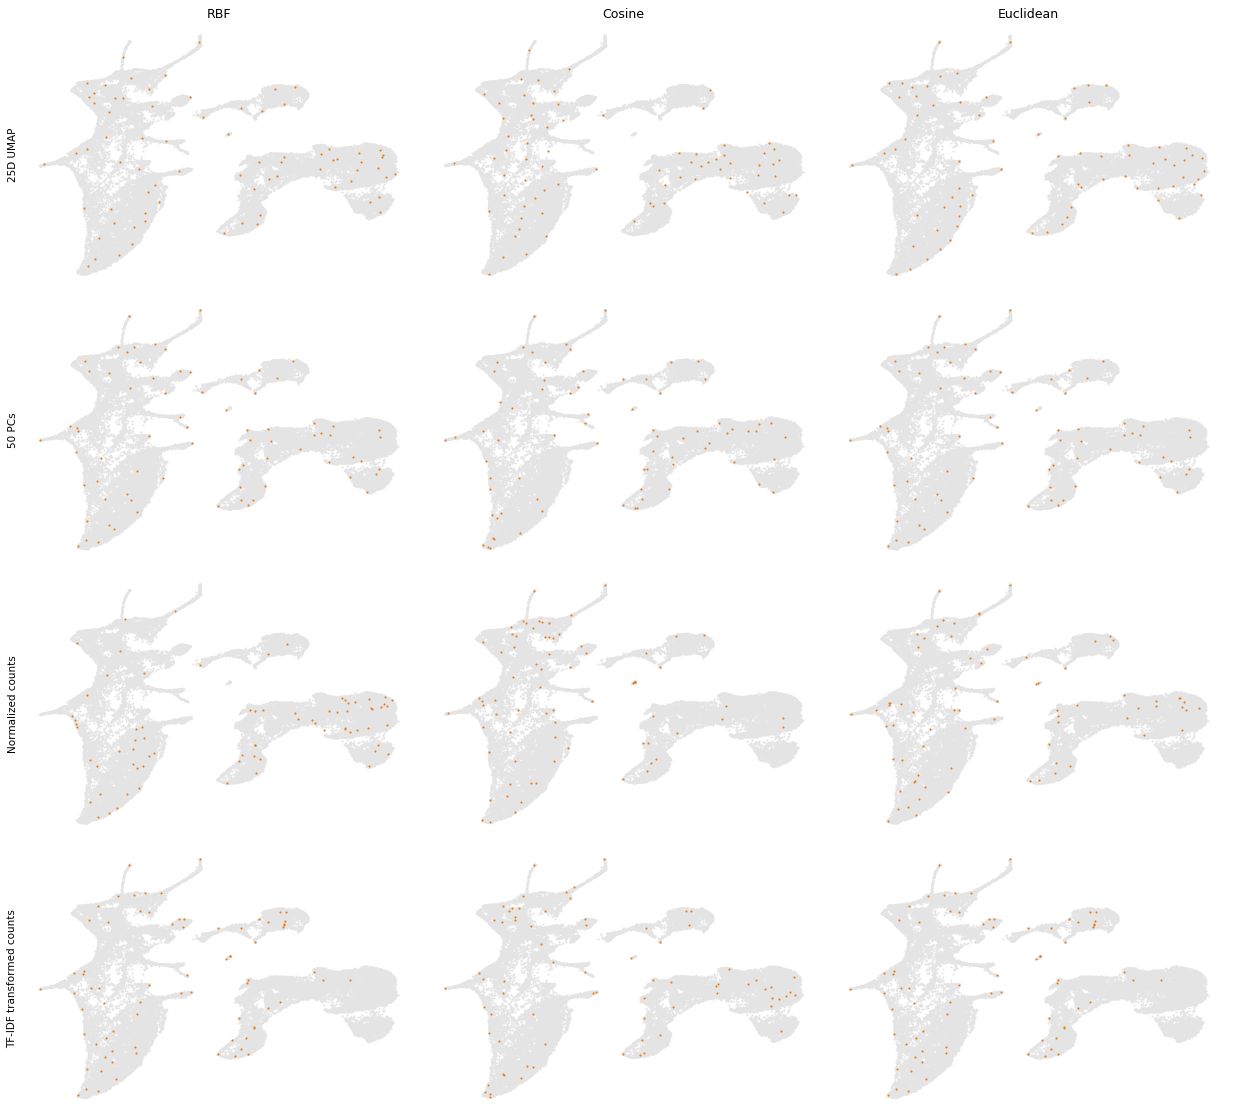

In [62]:
fig, axs = plt.subplots(4, 3, dpi=75)
fig.set_figwidth(8.27*2)
fig.subplots_adjust(wspace=0.3)
fig.set_figheight(15)
for c, ax in zip(cells.index, axs.ravel()):
    ax.scatter(UMAP_RNA[:, 0], UMAP_RNA[:, 1], c="#e4e4e4", s=1)
    ax.scatter(UMAP_RNA[cells.loc[c, :], 0], UMAP_RNA[cells.loc[c, :], 1],
               c="#eb7b14", s=1)
    ax.get_xaxis().set_visible(False)
    ax.set_yticks([])
    ax.set_frame_on(False)
axs[0][0].set_title("RBF")
axs[0][1].set_title("Cosine")
axs[0][2].set_title("Euclidean")
axs[0][0].set_ylabel("25D UMAP")
axs[1][0].set_ylabel("50 PCs")
axs[2][0].set_ylabel("Normalized counts")
axs[3][0].set_ylabel("TF-IDF transformed counts")
plt.tight_layout()

### Figure S6

In [63]:
# load enrichment scores for data-driven selected cells
# at different values of gamma
escores_8e1 = pd.read_csv("greenleaf_scRNA_escores_knn_rbf_8e-1.txt",
                          sep="\t", index_col=0)
escores_8e2 = pd.read_csv("greenleaf_scRNA_escores_knn_rbf_8e-2.txt",
                          sep="\t", index_col=0)
escores_8e3 = pd.read_csv("greenleaf_scRNA_escores_knn_rbf_8e-3.txt",
                          sep="\t", index_col=0)

In [64]:
idxs = ["13820", "11487", "26667"]  # selected cells

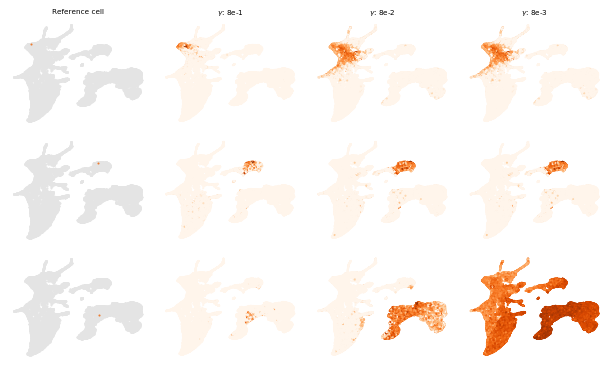

In [65]:
fig, axs = plt.subplots(3, 4, dpi=75)
fig.set_figwidth(8.27)
fig.set_figheight(5)
for i, idx in enumerate(idxs):
    axs[i][0].scatter(UMAP_RNA[:, 0], UMAP_RNA[:, 1], color="#e4e4e4", s=1)
    axs[i][0].scatter(UMAP_RNA[int(idx), 0], UMAP_RNA[int(idx), 1], color="#ed7d31", s=1)
    for j, escores in enumerate([escores_8e1, escores_8e2, escores_8e3]):
        top = escores.sort_values(by=idx, ascending=False).index[i]
        axs[i][j + 1].scatter(UMAP_RNA[:, 0], UMAP_RNA[:, 1],
                              c=X_RNA[:, genes.index(top)].A.ravel(),
                              cmap="Oranges", s=1)
for ax in axs.ravel():
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
axs[0][0].set_title("Reference cell", fontsize=7)
axs[0][1].set_title(r"$\gamma$: 8e-1", fontsize=7)
axs[0][2].set_title(r"$\gamma$: 8e-2", fontsize=7)
axs[0][3].set_title(r"$\gamma$: 8e-3", fontsize=7)
plt.tight_layout()

### Figure S7
Figure S7 was made in a separate notebook for interactive design. The scripts are found as S3_coenrichment_interaction_values.ipynb

### Figure S8
Figure S8 was made in a separate notebook for interactive design. The scripts are found in S3_coenrichment_interactions_values.ipynb

### Figure S9
Figure S9 was made in a separate notebook for interactive design. The scripts are found as S3_coenrichment_interactions_values.ipynb, S3_coenrichment_maximum_values.ipynb, S3_coenrichment_median_values.ipynb, S3_coenrichment_minimum_values.ipynb

### Figure S10

In [66]:
params = {"mathtext.default": "regular"}
# get the order
order = ["HSC", "MPP",
         "CMP", "MEP", "ERYTHROCYTE",
         "GMP", "GP", "BASO",
         "MP", "IMMATURE MONO_CLAS", "MONO_CLAS", "MONO_INT", "MONO_NONCLAS",
         "CLP", "PRE_B", "B_TRANSITIONAL", "B_NAIVE", "B_MEMORY", "PLASMABLAST",
         "PLASMA",
         "CD4_NAIVE", "CD4_MEMORY", "CD4_TH17", "T_REG",
         "CD8_NAIVE", "CD8_CENTRAL_MEMORY", "CD8_EFFECTOR_MEMORY", "CD8_MAIT",
         "CD8_TERM_EFFECT", "NK", "mDC", "pDC"]
# change to nice labels
labels = ["HSC", "MPP",
          "CMP", "MEP", "Erythrocyte",
          "GMP", "GP", "Basophils",
          "MP",  "Immature monocyte", "Classical monocyte", "Intermediate monocyte",
          "Non-classical monocyte",
          "CLP", "Pre-B", "Transitional B", "Naive B", "B memory", "Plasmablast", "Plasma",
          r"Naive CD4$^{+}$", r"CD4$^{+}$ memory", r"CD4$^{+}$ T$_{h}$17",
          r"T$_{reg}$",
          r"Naive CD8$^{+}$", r"CD8$^{+}_{CM}$", r"CD8$^{+}_{EM}$", r"CD8$^{+}$ MAIT",
          r"CD8$^{+}_{TE}$", "NK", "mDC", "pDC"]
# make a colourmap
GUI_annots = GUI_annots.replace(dict(zip(order, labels)))
order = labels
colors = list(GUI_annots.COLOUR)
labels = GUI_annots.ANNOT
idxs = [int(i) for i in GUI_annots.ID]
# create a legend
coldict = dict(zip(GUI_annots.ANNOT, GUI_annots.COLOUR))
legend = {k: coldict[k] for k in order}
marker = [plt.Line2D([0,0], [0,0], color=c, marker="o", ls="", markersize=2)
          for c in legend.values()]

In [67]:
# load all UMAPs for top enriched genes and top variable genes
UE4000 = np.load("greenleaf_scRNA_E4000_UMAP.npy")
UD4000 = np.load("greenleaf_scRNA_D4000_UMAP.npy")
UE2000 = np.load("greenleaf_scRNA_E2000_UMAP.npy")
UD2000 = np.load("greenleaf_scRNA_D2000_UMAP.npy")
UE1000 = np.load("greenleaf_scRNA_E1000_UMAP.npy")
UD1000 = np.load("greenleaf_scRNA_D1000_UMAP.npy")
UE500 = np.load("greenleaf_scRNA_E500_UMAP.npy")
UD500 = np.load("greenleaf_scRNA_D500_UMAP.npy")

UMAPs = [UE4000, UD4000, UE2000, UD2000, UE1000, UD1000, UE500, UD500]

Unames = ["top 4000 enriched", "top 4000 HVGs",
          "top 2000 enriched", "top 2000 HVGs",
          "top 1000 enriched", "top 1000 HVGs",
          "top 500 enriched", "top 500 HVGs"]

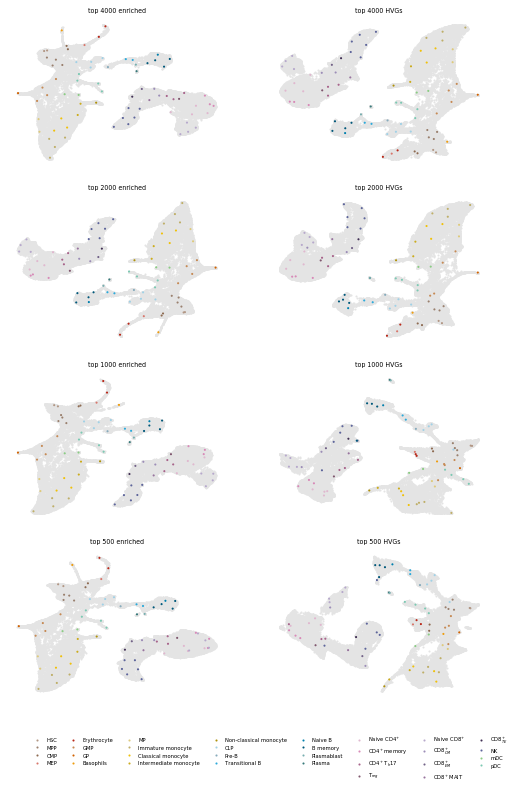

In [68]:
fig, axs = plt.subplots(4, 2, dpi=75)
fig.set_figwidth(8.27)
fig.set_figheight(12)
for UMAP, t, ax in zip(UMAPs, Unames, axs.ravel()):
    ax.scatter(UMAP[:, 0], UMAP[:, 1], color="#e4e4e4", s=1)
    ax.scatter(UMAP[idxs, 0], UMAP[idxs, 1], c=colors, s=1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    ax.set_title(t, fontsize=6)
leg = plt.legend(marker, legend.keys(), numpoints=1, fontsize=5, ncol=8,
                 loc="lower center", bbox_to_anchor=(0, -0.6), markerscale=0.5)
leg.get_frame().set_linewidth(0.0)

### Figure S11

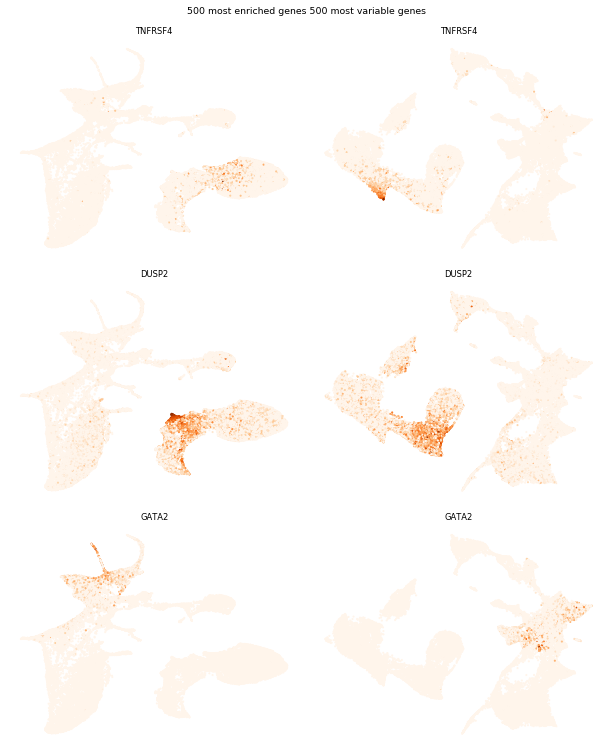

In [69]:
fig, axs = plt.subplots(3, 2, dpi=75)
fig.set_figwidth(8.27)
fig.set_figheight(10.5)
plt.subplots_adjust(wspace=0.1)
markers = ["TNFRSF4", "TNFRSF4", "DUSP2", "DUSP2", "GATA2", "GATA2"]  # known
for UMAP, ax, mark, t in zip(UMAPs[6:8] + UMAPs[6:8] + UMAPs[6:8],
                             axs.ravel(), markers,
                             ["enriched", "variable", "enriched", "variable", "enriched", "variable"]):
    ax.scatter(UMAP[:, 0], UMAP[:, 1],
               c=X_RNA[:, genes.index(mark)].data, s=1,
               cmap="Oranges")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    ax.set_title(mark, fontsize=8)
fig.suptitle("500 most enriched genes 500 most variable genes", fontsize=9)
plt.tight_layout(rect=[0, 0.03, 1, 0.97])

### Figure S12

In [70]:
# load ATAC-seq annotations
ATAC_annots = pd.read_csv("greenleaf_scATAC_knn_rbf_8e1_annotations.csv", sep="\t")

In [71]:
# get column names for positively enriched genes
cols = [k for k in positives.keys() if len(positives[k]) > 0]

In [72]:
# define the order of columns
order = ["HSC", "MPP",
         "CLP", "CMP",
         "MEP", "GMP",
         "GP", "MP", "PRE_B", "preDC", "B_TRANSITIONAL",
         "ERYTHROCYTE", "BASO",
         "MONO", "MONO_CLAS", "MONO_INT", "MoDC",
         "B_NAIVE", "B_MEMORY", "PLASMA",
         "CD4_NAIVE", "CD4_MEMORY", "CD8_MAIT",
         "CD8_EFFECTOR_MEMORY", "CD8_TERM_EFFECT",
         "NK", "pDC"]

In [73]:
# get all postively enriched promoters and enhancers
n_pos.columns = cols
n_pos_prom = {}
n_pos_enh = {}
for a in order:
    newa = ATAC_annots[ATAC_annots.ID.isin(cols)]
    ids = newa[newa.ANNOT == a].ID
    ids = [str(k) for k in ids]
    n = n_pos.loc["promoter", ids]
    n_pos_prom[a] = n.values
    n = n_pos.loc["enhancer", ids]
    n_pos_enh[a] = n.values

([<matplotlib.axis.XTick at 0x7f6ac3c26240>,
 <a list of 27 Text xticklabel objects>)

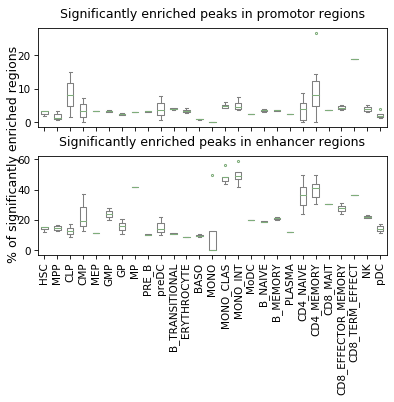

In [74]:
c1 = "#6458ad"
c2 = "#7fad7b"
c3 = "#eca639"

fig, axs = plt.subplots(ncols=1, nrows=2, dpi=75)
plt.subplots_adjust(hspace=0.3)

labels, data = n_pos_prom.keys(), n_pos_prom.values()
box1 = axs[0].boxplot(data, flierprops={"markeredgecolor": c2, "markersize": 2})
set_box_color(box1, c2)
axs[0].set_title("Significantly enriched peaks in promotor regions",
                 fontsize=12, y=1.05)
axs[0].xaxis.set_ticklabels([])

labels, data = n_pos_enh.keys(), n_pos_enh.values()
box2 = axs[1].boxplot(data, flierprops={"markeredgecolor": c2, "markersize": 2})
set_box_color(box2, c2)
axs[1].set_title("Significantly enriched peaks in enhancer regions",
                 fontsize=12, y=1.05)
axs[1].set_ylabel("% of significantly enriched regions", fontsize=12)
axs[1].yaxis.set_label_coords(-0.05, 1.02)

plt.sca(axs[1])
plt.xticks(range(1, len(labels) + 1), labels, rotation=90)

### Figure S13

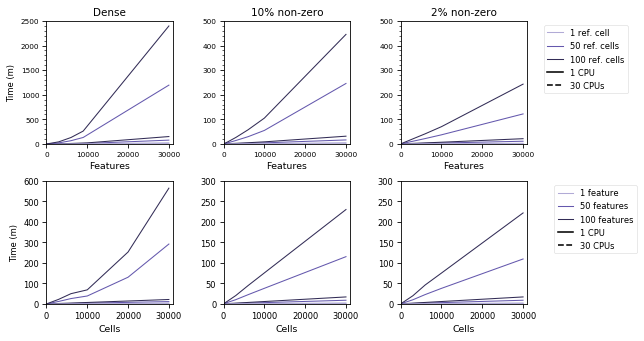

In [75]:
# plot the runtime for different combinations of feature and reference cell numbers
c1 = "#b1abd6"
c2 = "#6458ad"
c3 = "#322c56"
cs = [c1, c2, c3]

# plot 2 rows and 3 columns
fig, axs = plt.subplots(2, 3, dpi=75)
fig.set_figwidth(8.27)
fig.set_figheight(5)
plt.subplots_adjust(wspace=0.4, hspace=0.3)

for d, ax in zip(["dense", "10psparse", "2psparse"], axs[0]):  # iterative over densities for the top row
    # load the data
    if d == "2psparse":
        t1 = pd.read_csv(f"20200515_timeit_{d}_optimcols_small.txt", sep="\t",
                         index_col=0)
    else:
        t1 = pd.read_csv(f"20200515_timeit_{d}_optimcols.txt", sep="\t",
                         index_col=0)
    t2 = pd.read_csv(f"20200515_timeit_{d}_optimcols_1cpu.txt", sep="\t",
                     index_col=0)
    # subset the data
    if d == "dense":
        feat1 = t1.iloc[:, [0, 2, 3, 4, 5, 7]]
        feat2 = t1.iloc[:, [8, 10, 11, 12, 13, 15]]
        feat3 = t1.iloc[:, [16, 18, 19, 20, 21, 23]]
    else:
        feat1 = t1.iloc[:, 0:6]
        feat2 = t1.iloc[:, 6:12]
        feat3 = t1.iloc[:, 12:18]
    if d == "10psparse":
        feat4 = t2.iloc[:, 0:6]
        feat5 = t2.iloc[:, 6:12]
        feat6 = t2.iloc[:, 12:18]
    if d == "dense":
        feat4 = t2.iloc[:, 0:5]
        feat5 = t2.iloc[:, 5:10]
        feat6 = t2.iloc[:, 10:16]
    if d == "2psparse":
        feat4 = t2.iloc[:, 0:4]
        feat5 = t2.iloc[:, 4:8]
        feat6 = t2.iloc[:, 8:12]
    ncells = [1, 1000, 3000, 6000, 10000, 30000]
    for t, c in zip([feat1, feat2, feat3], cs):  # iterative of different numbers of cells 30 CPU
        if c == c1:
            label="1 ref. cell"
        elif c == c2:
            label="50 ref. cells"
        else:
            label="100 ref. cells"
        ax.plot(ncells, t.mean() / 60, label=label,
                color=c, linewidth=1)
    for t, c in zip([feat4, feat5, feat6], cs):  # iterative of different numbers of cells 1 CPU
        if d == "2psparse":
            ncells = [1, 6000, 10000, 30000]
        elif d == "dense":
            ncells = [1, 3000, 6000, 9000, 30000]
        ax.plot(ncells, t.mean() / 60, label=label,
                color=c, linewidth=1, ls="-")
    # set limits
    ax.set_xlim(0, 31000)
    ax.set_xlabel("Features", fontsize=9)
    ax.set_xticks(ticks=[0, 10000, 20000, 30000])
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(axis="both", labelsize=7)

for d, ax in zip(["dense", "10psparse", "2psparse"], axs[1]):  # iterative over densities for the bottom row
    if d != "2psparse":
        t1 = pd.read_csv(f"20200515_timeit_{d}_optimrows.txt", sep="\t",
                         index_col=0)
    t2 = pd.read_csv(f"20200515_timeit_{d}_optimrows_1cpu.txt", sep="\t",
                     index_col=0)
    if d == "dense":
        feat1 = t1.iloc[:, np.arange(0, 24, 3)]
        feat2 = t1.iloc[:, np.arange(1, 25, 3)]
        feat3 = t1.iloc[:, np.arange(2, 26, 3)]
        feat4 = t2.iloc[:, np.arange(0, 24, 3)]
        feat5 = t2.iloc[:, np.arange(1, 25, 3)]
        feat6 = t2.iloc[:, np.arange(2, 26, 3)]
    else:
        feat1 = t1.iloc[:, np.arange(0, 18, 3)]
        feat2 = t1.iloc[:, np.arange(1, 19, 3)]
        feat3 = t1.iloc[:, np.arange(2, 20, 3)]
        feat4 = t2.iloc[:, np.arange(0, 18, 3)]
        feat5 = t2.iloc[:, np.arange(1, 19, 3)]
        feat6 = t2.iloc[:, np.arange(2, 20, 3)]
    ncells = [int(n.split("_")[0]) for n in feat1.columns]
    for t, c in zip([feat1, feat2, feat3], cs):
        if c == c1:
            label="1 feature"
        elif c == c2:
            label="50 features"
        else:
            label="100 features"
        ax.plot(ncells, t.mean() / 60, label=label,
                color=c, linewidth=1)
    for t, c in zip([feat4, feat5, feat6], cs):
        ax.plot(ncells, t.mean() / 60, label=label,
                color=c, linewidth=1, ls="-")
    ax.set_xlim(0, 31000)
    ax.set_ylim(-.5, 600)
    ax.set_xticks(ticks=[0, 10000, 20000, 30000])
    ax.set_xlabel("Cells", fontsize=9)
    ax.tick_params(axis="both", labelsize=8)
    
# dense
axs[0][0].set_ylim(-.5, 2500)
axs[0][0].set_ylabel("Time (m)", fontsize=8)
axs[0][0].set_title("Dense", fontsize=10)
# 10% non-zero
axs[0][1].set_title("10% non-zero", fontsize=10)
axs[0][1].set_ylim(-.5, 600)
# 2 % non-zero
axs[0][2].set_title("2% non-zero", fontsize=10)
axs[0][2].set_ylim(-.5, 600)

# legend for top panel
handles, labels = axs[0][2].get_legend_handles_labels()
display = (0,1,2)
cpu1 = plt.Line2D((0,1),(0,0), color="black", linestyle="-")
cpu30 = plt.Line2D((0,1),(0,0), color="black", linestyle="--")
leg1 = axs[0][2].legend([handle for i, handle in enumerate(handles)
           if i in display] + [cpu1, cpu30],
          [label for i, label in enumerate(labels)
           if i in display] + ["1 CPU", "30 CPUs"], ncol=1,
         bbox_to_anchor=(1.1, 1), fontsize=8, handlelength=1.9)
leg1.get_frame().set_linewidth(0.5)

# set limits
axs[0][1].set_ylim(-.5, 500)
axs[0][2].set_ylim(-.5, 500)
axs[1][1].set_ylim(-.5, 300)
axs[1][2].set_ylim(-.5, 300)
axs[1][0].set_ylabel("Time (m)", fontsize=8)

# plot the legend
handles, labels = axs[1][2].get_legend_handles_labels()
display = (0, 1, 2)
leg2 = axs[1][2].legend([handle for i, handle in enumerate(handles)
           if i in display] + [cpu1, cpu30],
          [label for i, label in enumerate(labels)
           if i in display] + ["1 CPU", "30 CPUs"], ncol=1,
         bbox_to_anchor=(1.9, 1), fontsize=8, handlelength=1.9)
leg2.get_frame().set_linewidth(0.5)